In [11]:
#Hello

In [12]:
#Import Libraries
import pandas as pd
import os

In [13]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")

In [14]:
ace_violations = pd.read_csv(os.path.join(DATA_DIR, "ACE_violations.csv"))

In [20]:
ace_violations.head()

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489740584,8cbe318769ba20029ec779cecda866b70a9f287224608c...,2025-08-20 22:27:20,2025-08-20 22:35:38,DRIVER/VEHICLE INFO MISSING,MOBILE DOUBLE PARKED,BX19,40.822820,-73.891765,103990,E 163 ST/SOUTHERN BLVD,40.821027,-73.891402,POINT (-73.891765 40.82282),POINT (-73.891402 40.821027)
1,489740421,8cc9b5062f26e2e88c8f8f370a8c91f159c7ec64f77104...,2025-08-20 21:37:30,2025-08-20 22:00:06,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,BX19,40.814338,-73.913096,101370,E 149 ST/TRINITY AV,40.813559,-73.910473,POINT (-73.913096 40.814338),POINT (-73.910473 40.813559)
2,489738197,d7ef9bd33bbd4738d9603027a74e128dbe708dfd3d5532...,2025-08-20 15:25:53,2025-08-20 19:14:06,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,BX19,40.813205,-73.909070,101314,E 149 ST/TRINITY AV,40.813420,-73.910157,POINT (-73.90907 40.813205),POINT (-73.910157 40.81342)
3,489737812,1748843257a0610319e4551b5094e6cd3824593eab130e...,2025-08-20 12:25:07,2025-08-20 12:30:25,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,BX19,40.814812,-73.914604,103748,E 149 ST/BERGEN AV,40.815686,-73.916991,POINT (-73.914604 40.814812),POINT (-73.916991 40.815686)
4,489737459,b90522ce7ba9099540c345c40fd443dec9e895a4eb7b85...,2025-08-20 18:45:19,2025-08-20 18:51:35,DRIVER/VEHICLE INFO MISSING,MOBILE BUS STOP,BX19,40.812155,-73.904038,101316,E 149 ST/WALES AV,40.812779,-73.907136,POINT (-73.904038 40.812155),POINT (-73.907136 40.812779)


In [17]:
# Number of rows and columns
print(ace_violations.shape)

print(ace_violations.info())

# Summary statistics for numeric columns
print(ace_violations.describe())

# For object (string/categorical) columns
print(ace_violations.describe(include="object"))

# Count missing values per column
print(ace_violations.isna().sum())


(344147, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344147 entries, 0 to 344146
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Violation ID            344147 non-null  int64  
 1   Vehicle ID              344067 non-null  object 
 2   First Occurrence        344147 non-null  object 
 3   Last Occurrence         344147 non-null  object 
 4   Violation Status        344147 non-null  object 
 5   Violation Type          344147 non-null  object 
 6   Bus Route ID            344147 non-null  object 
 7   Violation Latitude      344147 non-null  float64
 8   Violation Longitude     344147 non-null  float64
 9   Stop ID                 344147 non-null  int64  
 10  Stop Name               344147 non-null  object 
 11  Bus Stop Latitude       344147 non-null  float64
 12  Bus Stop Longitude      344147 non-null  float64
 13  Violation Georeference  344147 non-null  object 
 14  Bus Sto

In [18]:
# Most common violation statuses
print(ace_violations["Violation Status"].value_counts())

# Most common violation types
print(ace_violations["Violation Type"].value_counts())

# Bus routes with most violations
print(ace_violations["Bus Route ID"].value_counts().head(10))


Violation Status
VIOLATION ISSUED                226757
EXEMPT - COMMERCIAL UNDER 20     33803
DRIVER/VEHICLE INFO MISSING      28303
TECHNICAL ISSUE/OTHER            22249
EXEMPT - EMERGENCY VEHICLE       19126
EXEMPT - BUS/PARATRANSIT          7093
EXEMPT - OTHER                    6816
Name: count, dtype: int64
Violation Type
MOBILE DOUBLE PARKED    211781
MOBILE BUS STOP          83836
MOBILE BUS LANE          48530
Name: count, dtype: int64
Bus Route ID
BX19    344147
Name: count, dtype: int64


In [19]:
ace_violations["First Occurrence"] = pd.to_datetime(ace_violations["First Occurrence"])
ace_violations["Last Occurrence"] = pd.to_datetime(ace_violations["Last Occurrence"])

# Check the time range
ace_violations["First Occurrence"].min(), ace_violations["Last Occurrence"].max()

# Make sure lat/lon values look reasonable
ace_violations[["Violation Latitude", "Violation Longitude"]].describe()


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_53786/2785423671.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ace_violations["First Occurrence"] = pd.to_datetime(ace_violations["First Occurrence"])
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_53786/2785423671.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ace_violations["Last Occurrence"] = pd.to_datetime(ace_violations["Last Occurrence"])


,Violation Latitude,Violation Longitude
count,344147.000000,344147.000000
mean,40.823024,-73.909206
std,0.009641,0.021214
min,40.812095,-73.955510
25%,40.816122,-73.921577
50%,40.822084,-73.902641
75%,40.826057,-73.891853
max,40.860971,-73.880513


In [21]:
ace_violations["First Occurrence"] = pd.to_datetime(
    ace_violations["First Occurrence"], errors="coerce"
)
ace_violations["Quarter"] = ace_violations["First Occurrence"].dt.to_period("Q")

violations_per_quarter = (
    ace_violations.groupby("Quarter")["Violation ID"]
    .count()
    .reset_index(name="Total Violations")
)

print(violations_per_quarter)


   Quarter  Total Violations
0   2022Q4              1165
1   2023Q1              5718
2   2023Q2              1894
3   2023Q3              3192
4   2023Q4              6216
5   2024Q1              5314
6   2024Q2             13349
7   2024Q3             88025
8   2024Q4             74138
9   2025Q1             60744
10  2025Q2             62536
11  2025Q3             21856


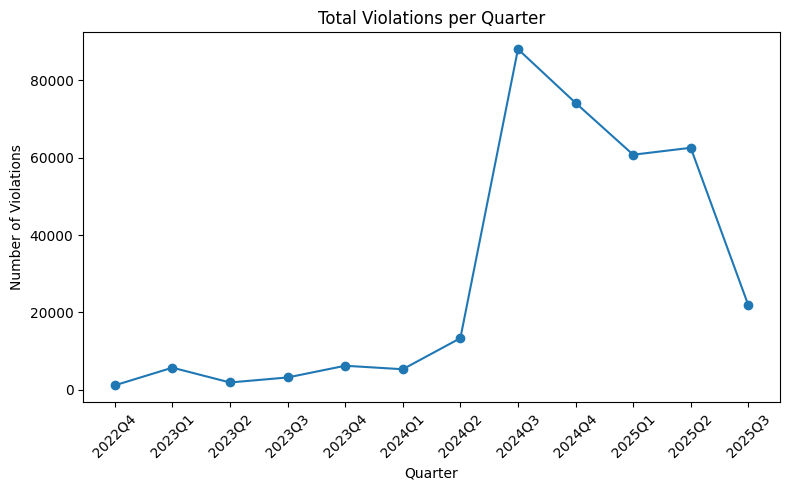

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(violations_per_quarter["Quarter"].astype(str),
         violations_per_quarter["Total Violations"], marker="o")
plt.title("Total Violations per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#ACE Program was implemented 6/20/2024

  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 37.9 MB/s eta 0:00:0031m41.8 MB/s eta 0:00:01
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.7 MB/s eta 0:00:00
Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl (4.7 MB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "bus_evasion_df.csv")

# Save the CSV
bus_evasion_df.to_csv(output_path, index=False)

In [ ]:
#Bus Route Segment Speed

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
df = pd.read_csv(os.path.join(DATA_DIR, "segment_speed_2025.csv"))

# Load your data (replace 'your_file.csv' with your CSV path)
#df = pd.read_csv('/Users/danielbrown/Desktop/MTA_Bus_Route_Segment_Speeds__Beginning_2025_20250910.csv', parse_dates=['Timestamp'])

# Quick look at the data
print(df.head())
print(df.info())
# Unique values
unique_next_stops = df["Next Timepoint Stop Name"].unique()
print(unique_next_stops)

# How many unique
print("Number of unique stops:", df["Next Timepoint Stop Name"].nunique())

# Frequency counts
stop_counts = df["Next Timepoint Stop Name"].value_counts()
print(stop_counts.head(20))  # top 20 stops

   Year  Month               Timestamp Day of Week  Hour of Day Route ID  \
0  2025      3  03/01/2025 07:00:00 AM    Thursday            7     BX19   
1  2025      3  03/01/2025 11:00:00 AM    Thursday           11     BX19   
2  2025      3  03/01/2025 01:00:00 PM    Thursday           13     BX19   
3  2025      3  03/01/2025 12:00:00 AM    Thursday            0     BX19   
4  2025      3  03/01/2025 11:00:00 PM    Thursday           23     BX19   

  Direction Borough Route Type  Stop Order  ...  Next Timepoint Stop ID  \
0         N   Bronx      Local           3  ...                  103748   
1         N   Bronx      Local           3  ...                  103748   
2         N   Bronx      Local           3  ...                  103748   
3         N   Bronx      Local           3  ...                  103748   
4         N   Bronx      Local           3  ...                  103748   

  Next Timepoint Stop Name  Next Timepoint Stop Latitude  \
0       E 149 ST/BERGEN AV      

In [26]:
import pandas as pd

# Paths to your GTFS files
trips_path = "/Users/danielbrown/Desktop/gtfs_bx-3/trips.txt"
shapes_path = "/Users/danielbrown/Desktop/gtfs_bx-3/shapes.txt"

# Load GTFS files
trips = pd.read_csv(trips_path)
shapes = pd.read_csv(shapes_path)

print("Trips columns:", trips.columns)
print("Shapes columns:", shapes.columns)

print("Unique shape_ids in trips:", trips['shape_id'].nunique())
print("Unique shape_ids in shapes:", shapes['shape_id'].nunique())
print(shapes)

Trips columns: Index(['route_id', 'service_id', 'trip_id', 'trip_headsign', 'direction_id',
       'block_id', 'shape_id'],
      dtype='object')
Shapes columns: Index(['shape_id', 'shape_pt_lat', 'shape_pt_lon', 'shape_pt_sequence'], dtype='object')
Unique shape_ids in trips: 236
Unique shape_ids in shapes: 236
        shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence
0       BX010102     40.880624    -73.886010              10001
1       BX010102     40.880472    -73.885939              10002
2       BX010102     40.879792    -73.885819              10003
3       BX010102     40.879522    -73.885799              10004
4       BX010102     40.879316    -73.885768              10005
...          ...           ...           ...                ...
48992  SBS410102     40.861452    -73.891609              70021
48993  SBS410102     40.861712    -73.891349              70022
48994  SBS410102     40.861872    -73.891139              70023
48995  SBS410102     40.862192    -73.890699  

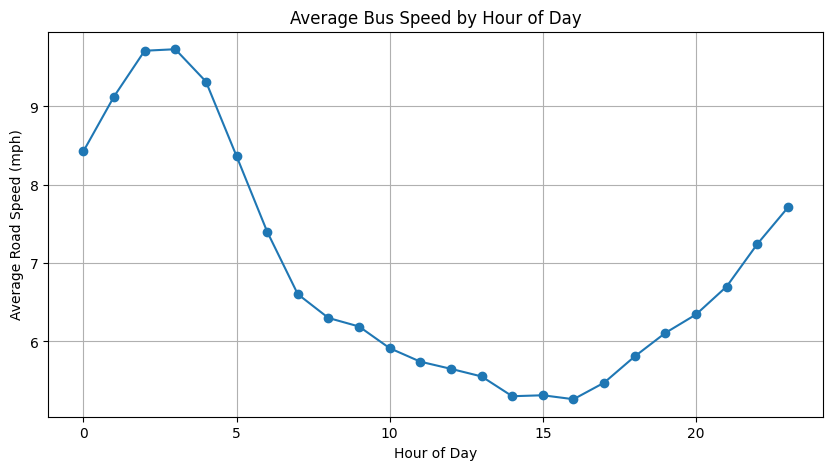

In [27]:
# Group by Hour of Day and compute mean speed
hourly_speed = df.groupby('Hour of Day')['Average Road Speed'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_speed.index, hourly_speed.values, marker='o')
plt.title('Average Bus Speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Road Speed (mph)')
plt.grid(True)
plt.show()

In [28]:
'''
import pandas as pd
import json

# Assuming your dataframe is named df

# 1. Group by Stop Pair + Hour (you can also include Day of Week if needed)
agg = (
    df.groupby([
        "Timepoint Stop ID", "Next Timepoint Stop ID", "Hour of Day"
    ])
    .agg({
        "Timepoint Stop Latitude": "first",
        "Timepoint Stop Longitude": "first",
        "Next Timepoint Stop Latitude": "first",
        "Next Timepoint Stop Longitude": "first",
        "Average Road Speed": "mean",
        "Bus Trip Count": "sum"
    })
    .reset_index()
)

# 2. Build GeoJSON
features = []
for _, row in agg.iterrows():
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": [
                [row["Timepoint Stop Longitude"], row["Timepoint Stop Latitude"]],
                [row["Next Timepoint Stop Longitude"], row["Next Timepoint Stop Latitude"]],
            ],
        },
        "properties": {
            "from_stop_id": int(row["Timepoint Stop ID"]),
            "to_stop_id": int(row["Next Timepoint Stop ID"]),
            "hour": int(row["Hour of Day"]),
            "avg_speed": float(row["Average Road Speed"]),
            "trip_count": int(row["Bus Trip Count"]),
        },
    }
    features.append(feature)

geojson = {"type": "FeatureCollection", "features": features}

# 3. Save to file
with open("/Users/danielbrown/Desktop/bx19_segments.geojson", "w") as f:
    json.dump(geojson, f)

#/Users/danielbrown/Desktop/Bus_Lanes_-_Local_Streets_20250910.csv
'''

In [ ]:
import pandas as pd
import json
from math import radians, sin, cos, sqrt, atan2

# --- 1. Load GTFS shapes ---
shapes = pd.read_csv("/Users/danielbrown/Desktop/gtfs_bx-3/shapes.txt")
shapes = shapes.sort_values(["shape_id", "shape_pt_sequence"])

# For now pick one shape_id (BX3 direction)
shape_id = "SBS120031"
route_shape = shapes[shapes["shape_id"] == shape_id]

# Convert to list of coords
shape_coords = list(zip(route_shape["shape_pt_lon"], route_shape["shape_pt_lat"]))

# --- 2. Helper: haversine distance ---
def haversine(lon1, lat1, lon2, lat2):
    R = 6371e3
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi, dlambda = radians(lat2-lat1), radians(lon2-lon1)
    a = sin(dphi/2)**2 + cos(phi1)*cos(phi2)*sin(dlambda/2)**2
    return 2*R*atan2(sqrt(a), sqrt(1-a))

def closest_index(lat, lon, coords):
    return min(range(len(coords)),
               key=lambda i: haversine(lon, lat, coords[i][1], coords[i][0]))

# --- 3. Merge with speed dataset ---
speeds = pd.read_csv("/Users/danielbrown/Desktop/MTA_Bus_Route_Segment_Speeds__Beginning_2025_20250910.csv", parse_dates=["Timestamp"])

features = []
for _, row in speeds.iterrows():
    # Find indices along shape for stop and next stop
    i1 = closest_index(row["Timepoint Stop Latitude"], row["Timepoint Stop Longitude"], shape_coords)
    i2 = closest_index(row["Next Timepoint Stop Latitude"], row["Next Timepoint Stop Longitude"], shape_coords)
    if i1 > i2: i1, i2 = i2, i1

    segment_coords = shape_coords[i1:i2+1]

    features.append({
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": segment_coords
        },
        "properties": {
            "route_id": row["Route ID"],
            "hour": row["Hour of Day"],
            "speed": row["Average Road Speed"],
            "trips": row["Bus Trip Count"]
        }
    })

geojson = {"type": "FeatureCollection", "features": features}

with open("/Users/danielbrown/Desktop/bx19_speeds_shapes.geojson", "w") as f:
    json.dump(geojson, f)

In [31]:
import pandas as pd
import json
from math import radians, sin, cos, sqrt, atan2

# --- 1. Load GTFS shapes ---
shapes = pd.read_csv("/Users/danielbrown/Desktop/gtfs_bx-3/shapes.txt")
shapes = shapes.sort_values(["shape_id", "shape_pt_sequence"])

# For now pick one shape_id
shape_id = "BX191713"
route_shape = shapes[shapes["shape_id"] == shape_id]

# Convert to list of coords (lon, lat)
shape_coords = list(zip(route_shape["shape_pt_lon"], route_shape["shape_pt_lat"]))

# --- 2. Helper: haversine distance ---
def haversine(lat1, lon1, lat2, lon2):
    R = 6371e3  # meters
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi, dlambda = radians(lat2 - lat1), radians(lon2 - lon1)
    a = sin(dphi/2)**2 + cos(phi1) * cos(phi2) * sin(dlambda/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1-a))

def closest_index(lat, lon, coords):
    # coords = list of (lon, lat)
    return min(range(len(coords)),
               key=lambda i: haversine(lat, lon, coords[i][1], coords[i][0]))

# --- 3. Load speed dataset ---
speeds = pd.read_csv("/Users/danielbrown/Desktop/datathon_project/data/raw/segment_speed_2025.csv",
                     parse_dates=["Timestamp"])

features = []
for _, row in speeds.iterrows():
    # Find indices along shape for stop and next stop
    i1 = closest_index(row["Timepoint Stop Latitude"], row["Timepoint Stop Longitude"], shape_coords)
    i2 = closest_index(row["Next Timepoint Stop Latitude"], row["Next Timepoint Stop Longitude"], shape_coords)
    
    # ensure i1 < i2
    if i1 > i2: i1, i2 = i2, i1
    
    # if indices are same, fallback to a direct line between stops
    if i1 == i2:
        segment_coords = [
            (row["Timepoint Stop Longitude"], row["Timepoint Stop Latitude"]),
            (row["Next Timepoint Stop Longitude"], row["Next Timepoint Stop Latitude"])
        ]
    else:
        segment_coords = shape_coords[i1:i2+1]

    features.append({
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": segment_coords
        },
        "properties": {
            "route_id": row["Route ID"],
            "hour": row["Hour of Day"],
            "speed": row["Average Road Speed"],
            "trips": row["Bus Trip Count"]
        }
    })

geojson = {"type": "FeatureCollection", "features": features}

with open("/Users/danielbrown/Desktop/bx19_speeds_shapes.geojson", "w") as f:
    json.dump(geojson, f)

print(f"GeoJSON created with {len(features)} features")

GeoJSON created with 11236 features


In [30]:
import pandas as pd
import json
from math import radians, sin, cos, sqrt, atan2

# --- 1. Load GTFS shapes and trips ---
shapes = pd.read_csv("/Users/danielbrown/Desktop/gtfs_bx-3/shapes.txt")
shapes = shapes.sort_values(["shape_id", "shape_pt_sequence"])

trips = pd.read_csv("/Users/danielbrown/Desktop/gtfs_bx-3/trips.txt")

# --- 2. Load speeds ---
speeds = pd.read_csv(
    "/Users/danielbrown/Desktop/datathon_project/data/raw/segment_speed_2025.csv",
    parse_dates=["Timestamp"]
)

# --- 3. Helper functions ---
def haversine(lat1, lon1, lat2, lon2):
    R = 6371e3
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi, dlambda = radians(lat2 - lat1), radians(lon2 - lon1)
    a = sin(dphi/2)**2 + cos(phi1)*cos(phi2)*sin(dlambda/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1-a))

def closest_index(lat, lon, coords):
    return min(range(len(coords)), key=lambda i: haversine(lat, lon, coords[i][1], coords[i][0]))

# --- 4. Map route+direction to shape_id ---
# Assume speeds Direction matches trips.direction_id somehow (or convert W/E to 0/1)
# We'll create a mapping: (route_id, direction) -> shape_id
direction_map = trips.groupby(['route_id', 'direction_id'])['shape_id'].first().to_dict()

# For your speeds data, convert Direction to 0/1 if needed
dir_map = {'W':0, 'E':1}  # adjust as needed
speeds['direction_id'] = speeds['Direction'].map(dir_map)

features = []

for _, row in speeds.iterrows():
    route_dir_key = (row["Route ID"], row["direction_id"])
    if route_dir_key not in direction_map:
        continue
    shape_id = direction_map[route_dir_key]
    route_shape = shapes[shapes["shape_id"] == shape_id]
    shape_coords = list(zip(route_shape["shape_pt_lon"], route_shape["shape_pt_lat"]))

    # Find indices along shape for stop and next stop
    i1 = closest_index(row["Timepoint Stop Latitude"], row["Timepoint Stop Longitude"], shape_coords)
    i2 = closest_index(row["Next Timepoint Stop Latitude"], row["Next Timepoint Stop Longitude"], shape_coords)
    
    if i1 > i2: i1, i2 = i2, i1

    # fallback if points are same
    if i1 == i2:
        segment_coords = [
            (row["Timepoint Stop Longitude"], row["Timepoint Stop Latitude"]),
            (row["Next Timepoint Stop Longitude"], row["Next Timepoint Stop Latitude"])
        ]
    else:
        segment_coords = shape_coords[i1:i2+1]

    features.append({
        "type": "Feature",
        "geometry": {"type": "LineString", "coordinates": segment_coords},
        "properties": {
            "route_id": row["Route ID"],
            "direction": row["Direction"],
            "hour": row["Hour of Day"],
            "speed": row["Average Road Speed"],
            "trips": row["Bus Trip Count"]
        }
    })

geojson = {"type": "FeatureCollection", "features": features}

with open("/Users/danielbrown/Desktop/bx19_speeds_shapes_directions.geojson", "w") as f:
    json.dump(geojson, f)

print(f"GeoJSON created with {len(features)} features")

GeoJSON created with 0 features


In [29]:
import pandas as pd
import json
from math import radians, sin, cos, sqrt, atan2

# --- 1. Load GTFS shapes and trips ---
shapes = pd.read_csv("/Users/danielbrown/Desktop/gtfs_bx-3/shapes.txt")
shapes = shapes.sort_values(["shape_id", "shape_pt_sequence"])

trips = pd.read_csv("/Users/danielbrown/Desktop/gtfs_bx-3/trips.txt")

# --- 2. Load speeds ---
speeds = pd.read_csv(
    "/Users/danielbrown/Desktop/datathon_project/data/raw/segment_speed_2025.csv",
    parse_dates=["Timestamp"]
)

# --- 2b. Aggregate speeds by Next Timepoint Stop Name, Hour of Day, and Direction ---
agg_speeds = (
    speeds.groupby(["Next Timepoint Stop Name", "Hour of Day", "Direction"], as_index=False)
    .agg(
        avg_speed=("Average Road Speed", "mean"),
        total_trips=("Bus Trip Count", "sum"),
        start_lat=("Timepoint Stop Latitude", "first"),
        start_lon=("Timepoint Stop Longitude", "first"),
        end_lat=("Next Timepoint Stop Latitude", "first"),
        end_lon=("Next Timepoint Stop Longitude", "first"),
        route_id=("Route ID", "first")
    )
)

# --- 3. Helper functions ---
def haversine(lat1, lon1, lat2, lon2):
    R = 6371e3
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi, dlambda = radians(lat2 - lat1), radians(lon2 - lon1)
    a = sin(dphi/2)**2 + cos(phi1)*cos(phi2)*sin(dlambda/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1-a))

def closest_index(lat, lon, coords):
    return min(range(len(coords)), key=lambda i: haversine(lat, lon, coords[i][1], coords[i][0]))

# --- 4. Map route+direction to shape_id ---
direction_map = trips.groupby(['route_id', 'direction_id'])['shape_id'].first().to_dict()
dir_map = {'W':0, 'E':1}  # adjust if needed
agg_speeds['direction_id'] = agg_speeds['Direction'].map(dir_map)

# --- 5. Build GeoJSON ---
features = []

for _, row in agg_speeds.iterrows():
    route_dir_key = (row["route_id"], row["direction_id"])
    if route_dir_key not in direction_map:
        continue
    shape_id = direction_map[route_dir_key]
    route_shape = shapes[shapes["shape_id"] == shape_id]
    shape_coords = list(zip(route_shape["shape_pt_lon"], route_shape["shape_pt_lat"]))

    # Find indices along shape for stop and next stop
    i1 = closest_index(row["start_lat"], row["start_lon"], shape_coords)
    i2 = closest_index(row["end_lat"], row["end_lon"], shape_coords)
    
    if i1 > i2: i1, i2 = i2, i1

    # fallback if points are the same
    if i1 == i2:
        segment_coords = [(row["start_lon"], row["start_lat"]), (row["end_lon"], row["end_lat"])]
    else:
        segment_coords = shape_coords[i1:i2+1]

    features.append({
        "type": "Feature",
        "geometry": {"type": "LineString", "coordinates": segment_coords},
        "properties": {
            "route_id": row["route_id"],
            "direction": row["Direction"],
            "hour": row["Hour of Day"],
            "speed": row["avg_speed"],
            "trips": row["total_trips"]
        }
    })

geojson = {"type": "FeatureCollection", "features": features}

with open("/Users/danielbrown/Desktop/bx19_segments.geojson", "w") as f:
    json.dump(geojson, f)

print(f"GeoJSON created with {len(features)} features")

GeoJSON created with 0 features
